<a href="https://colab.research.google.com/github/kamali1331/Credit-Card-Fraud-Detection-using-ML-/blob/main/Advanced_credit_card_fraud_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


In [7]:
import pandas as pd
df=pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
# Basic info
print(df.info())

# Check for null values
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0    284315
1       492
Name: Class, dtype: int64


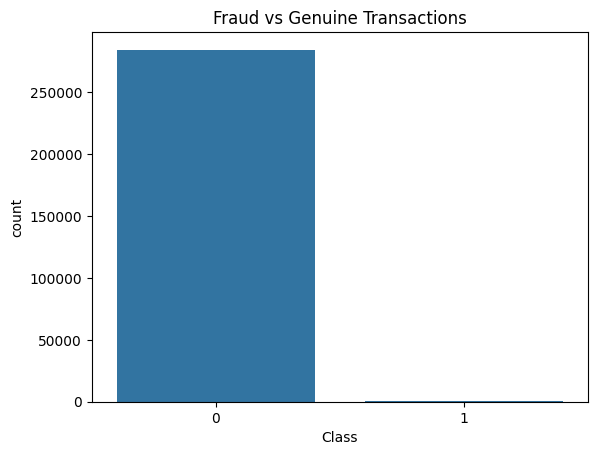

In [10]:
# Check class distribution
print(df['Class'].value_counts())

# Plot distribution
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Genuine Transactions")
plt.show()


In [18]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/creditcard.csv')

# 1. Remove duplicate rows
df.drop_duplicates(inplace=True)

# 2. Drop columns with too many missing values (e.g., > 40%)
threshold = len(df) * 0.4
df.dropna(thresh=threshold, axis=1, inplace=True)

# 3. Fill missing values (alternative methods below)
df.fillna(0, inplace=True)  # or use mean/median/mode
# df.fillna(df.mean(), inplace=True)
# df.fillna(method='ffill', inplace=True)

# Note: Outlier removal is removed to preserve minority class instances
# for col in numeric_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# 4. Reset index after cleaning (if needed, but drop_duplicates does it)
df.reset_index(drop=True, inplace=True)

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (283726, 31)


In [12]:
# Save to a CSV file in Colab's file system
df.to_csv("cleaned_data.csv", index=False)


Handle class Imbalance

0    109819
Name: Class, dtype: int64


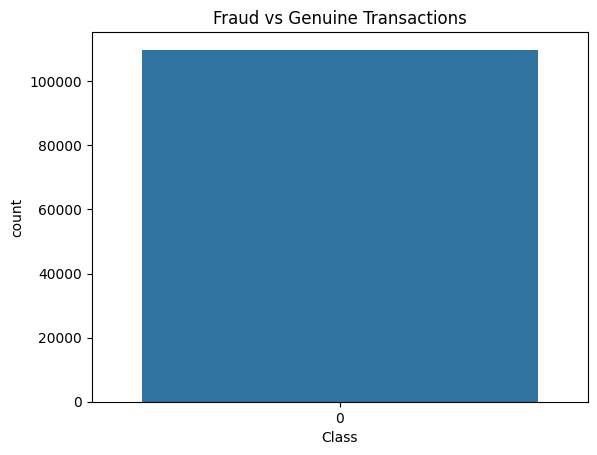

In [13]:
# Check class distribution
print(df['Class'].value_counts())

# Plot distribution
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Genuine Transactions")
plt.show()


Feature scaling (Time & amount)

In [14]:
from sklearn.preprocessing import StandardScaler

# Only scale 'Time' and 'Amount' as other features are already PCA-transformed
df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
df['scaled_time'] = StandardScaler().fit_transform(df[['Time']])

# Drop original 'Time' and 'Amount'
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Reorder columns
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

print("\nColumns after scaling:\n", df.columns)



Columns after scaling:
 Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')


Correlation Matrix

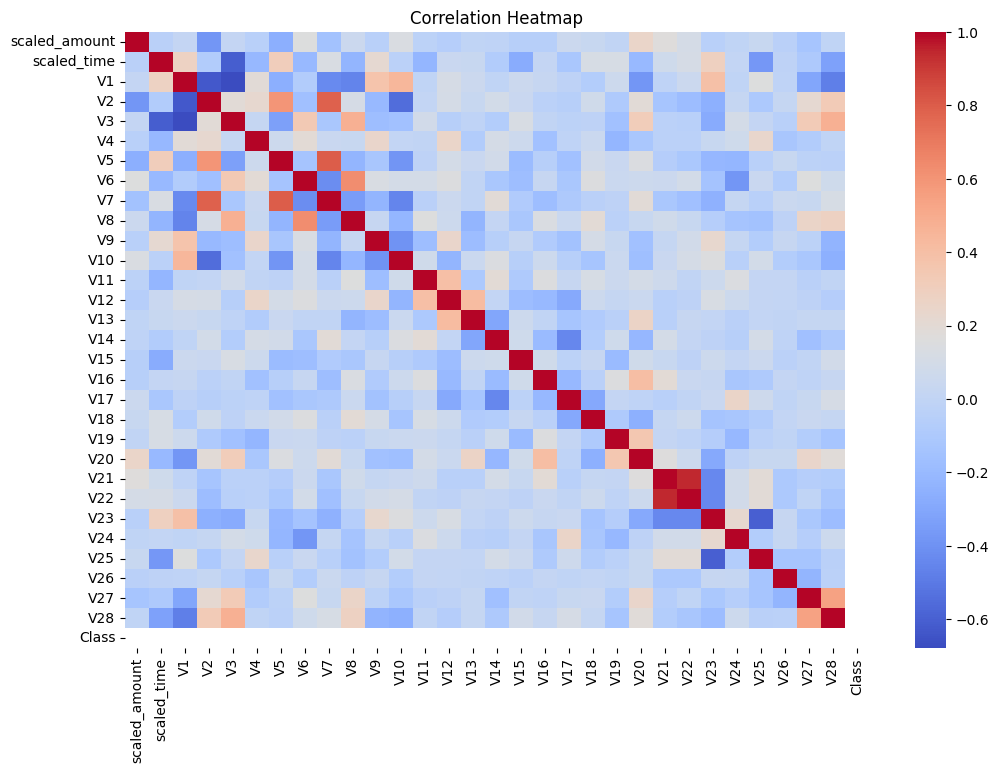

scaled_amount   NaN
scaled_time     NaN
V1              NaN
V2              NaN
V3              NaN
V4              NaN
V5              NaN
V6              NaN
V7              NaN
V8              NaN
Name: Class, dtype: float64


In [15]:
# Check correlation with target
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Optional: print top 10 most correlated features with Class
print(corr['Class'].sort_values(ascending=False).head(10))


Split Dataset for ML

In [16]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training and testing data shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Training and testing data shapes:
X_train: (87855, 30)
X_test: (21964, 30)


Handle Class Imbalance (SMOTE)

In [17]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Confirm balance
print("After SMOTE - class distribution:")
print(pd.Series(y_train_sm).value_counts())


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

Split Dataset for ML

In [20]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training and testing data shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Training and testing data shapes:
X_train: (226980, 30)
X_test: (56746, 30)
